In [2]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

from Analysis import plot_sky_density_healpy
from Analysis import plot_sky_density_proper_motion

# Density Maps (2/2) - Abs(b) < 10 
- The plotting pipelines are available in `Analysis` by defining them as functions it was easy to optimise hyperparamers

In [3]:
?plot_sky_density_proper_motion

Signature:
plot_sky_density_proper_motion(
    gaia_data,
    pm_cuts=[1, 3.5],
    cmap='inferno',
    min_count=7,
    min_count_color=5,
    max_count_color=95,
)
Docstring:
Generates multiple sky density visualizations using HEALPix:

1. **All-sky density map** (Mollweide projection) - visualizing star distribution in Galactic coordinates.
2. **False-color RGB composite** (Aitoff projection) - highlighting stellar populations in different brightness bins.
3. **Histogram of magnitudes** - showing how stars are divided into RGB bins.
4. **Histogram of sky density** - illustrating the distribution of star densities across HEALPix pixels.
5. **Rectangular projection of the RGB composite** - displaying Galactic coordinates without distortion.

Parameters:
-----------
gaia_data : pd.DataFrame
    Pandas DataFrame containing:
    - 'l' : Galactic longitude (degrees)
    - 'b' : Galactic latitude (degrees)
    - 'dered_G' : Dereddened Gaia G-band magnitude
nside : int, optional (default=12

In [3]:
# File path
rgb_data_path = 'data/Allsky_Gaia_42481846_extinction_corrected_filtered.fits'

# Load the FITS file with data used in this analysis
with fits.open(rgb_data_path, memmap=True) as hdul:
    data = hdul[1].data 
    ra = data['ra']
    dec = data['dec']
    l = data['l']
    b = data['b']
    dered_G = data['dered_G']
    dered_BP_RP = data['dered_BP_RP']
    pm = (data['pmra'] **2 + data['pmdec'] **2)**(1/2)


mag_bins = [14., 18.5]

# -------------------------------
# Global filter: color + magnitude
# -------------------------------
# The abs b is already applied in preprocessing but applied additionally here
w = (dered_BP_RP > 1.0) & (dered_G > mag_bins[0]) & (dered_G < mag_bins[1]) & (abs(b)>10)

# Apply to all relevant arrays
ra = ra[w]
dec = dec[w]
l = l[w]
b = b[w]
dered_G = dered_G[w]
dered_BP_RP = dered_BP_RP[w]
pm = pm[w]

# -------------------------------
# All-sky dataframe (Galactic)
# -------------------------------
all_sky = pd.DataFrame({
    'l': l,
    'b': b,
    'dered_G': dered_G,
    'ra': ra,
    'dec': dec,
    'dered_G': dered_G,
    'dered_BP_RP': dered_BP_RP,
    'pm': pm
})

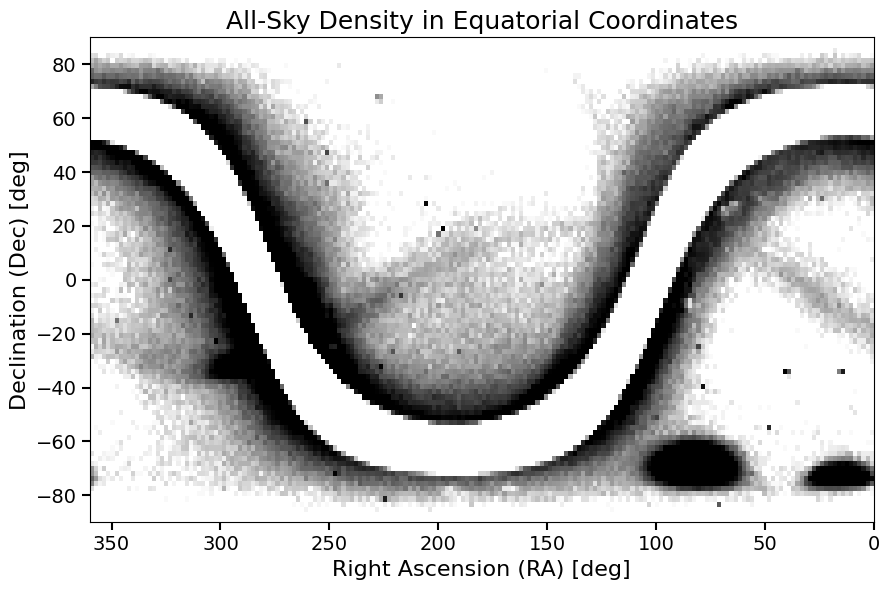

<Figure size 640x480 with 0 Axes>

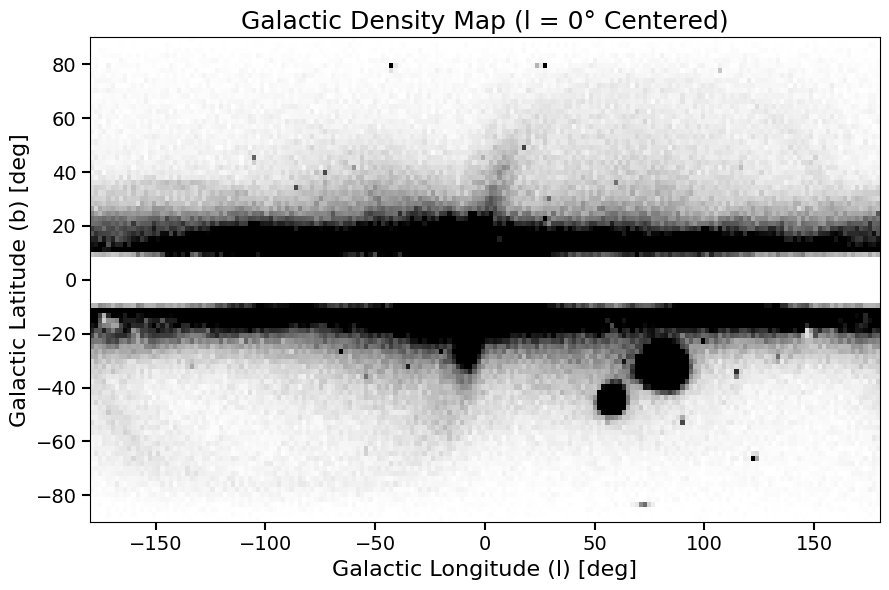

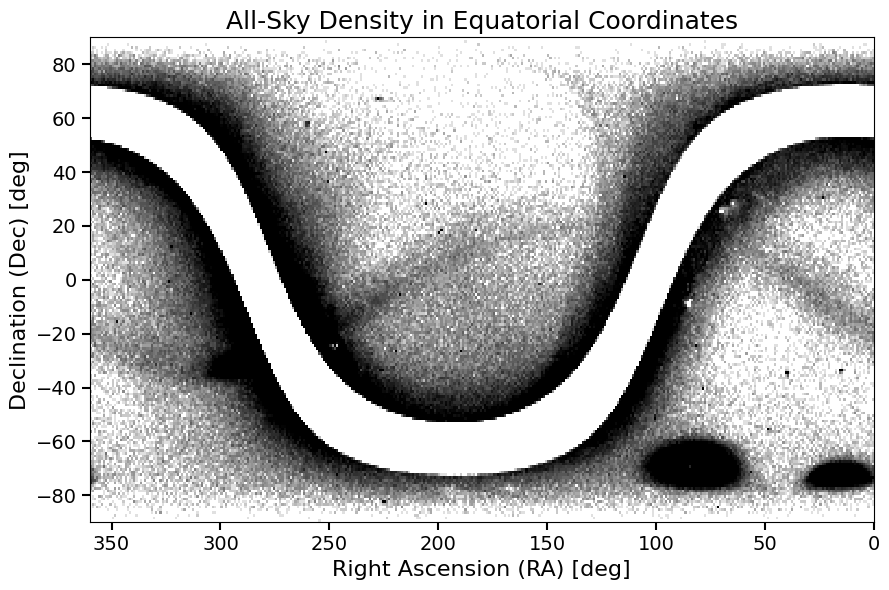

/Users/jacobtutt/Desktop/MPhil_DIS/Gal_Arc/Coursework_GA/Analysis/GA_analysis.py:1226: RuntimeWarning: divide by zero encountered in log10
  log_den = np.log10(den)

/Users/jacobtutt/Desktop/MPhil_DIS/Gal_Arc/Coursework_GA/Analysis/GA_analysis.py:1258: RuntimeWarning: divide by zero encountered in log10
  log_den = np.log10(den)



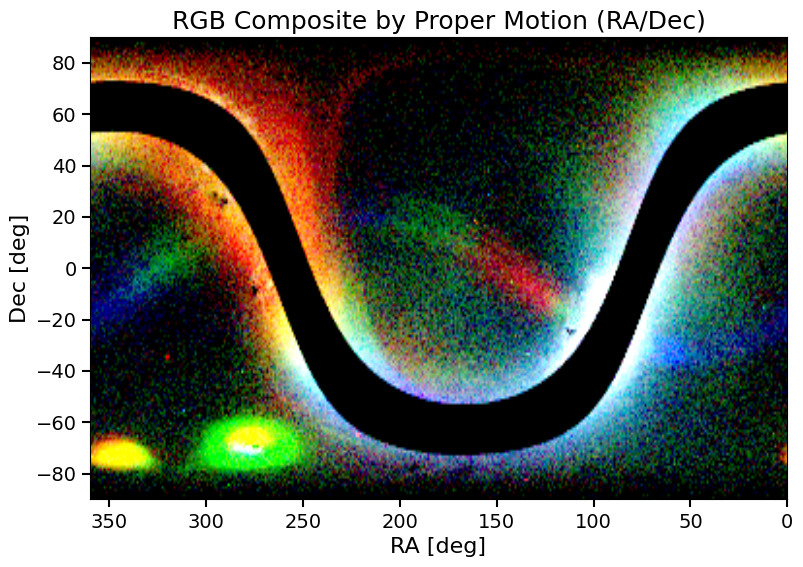

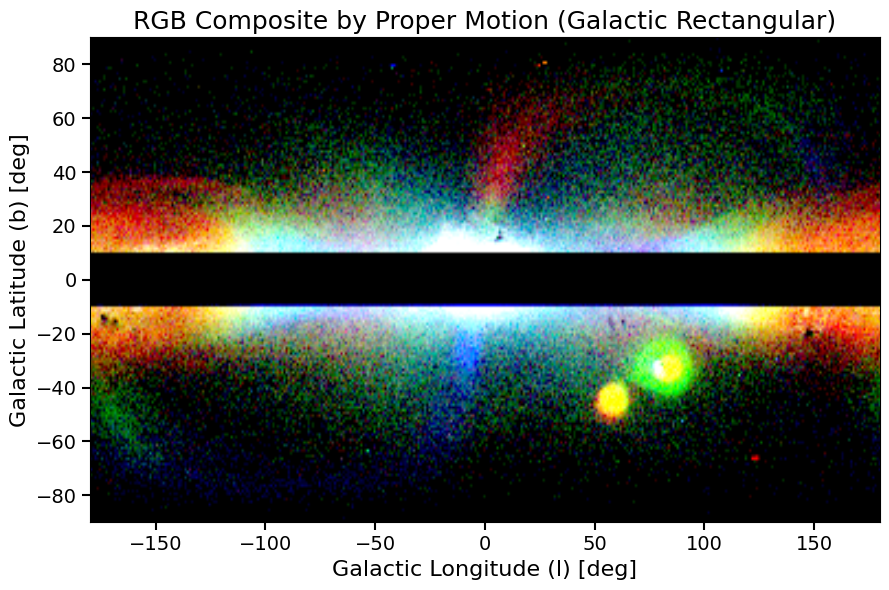

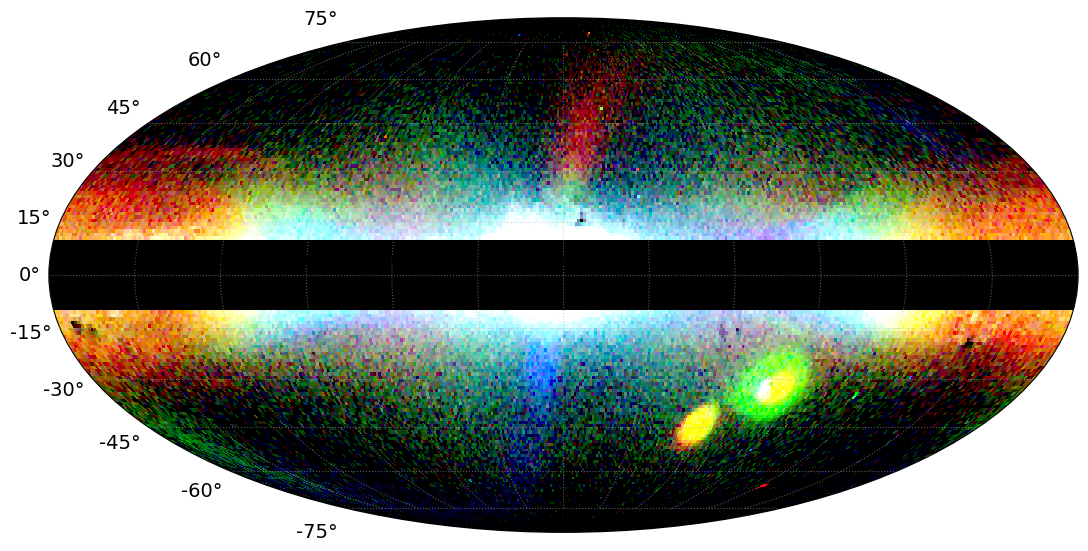

In [4]:
plot_sky_density_proper_motion(all_sky, pm_cuts=[0.5,3.5], cmap="binary",  min_count = 11, min_count_color =5, max_count_color = 95)

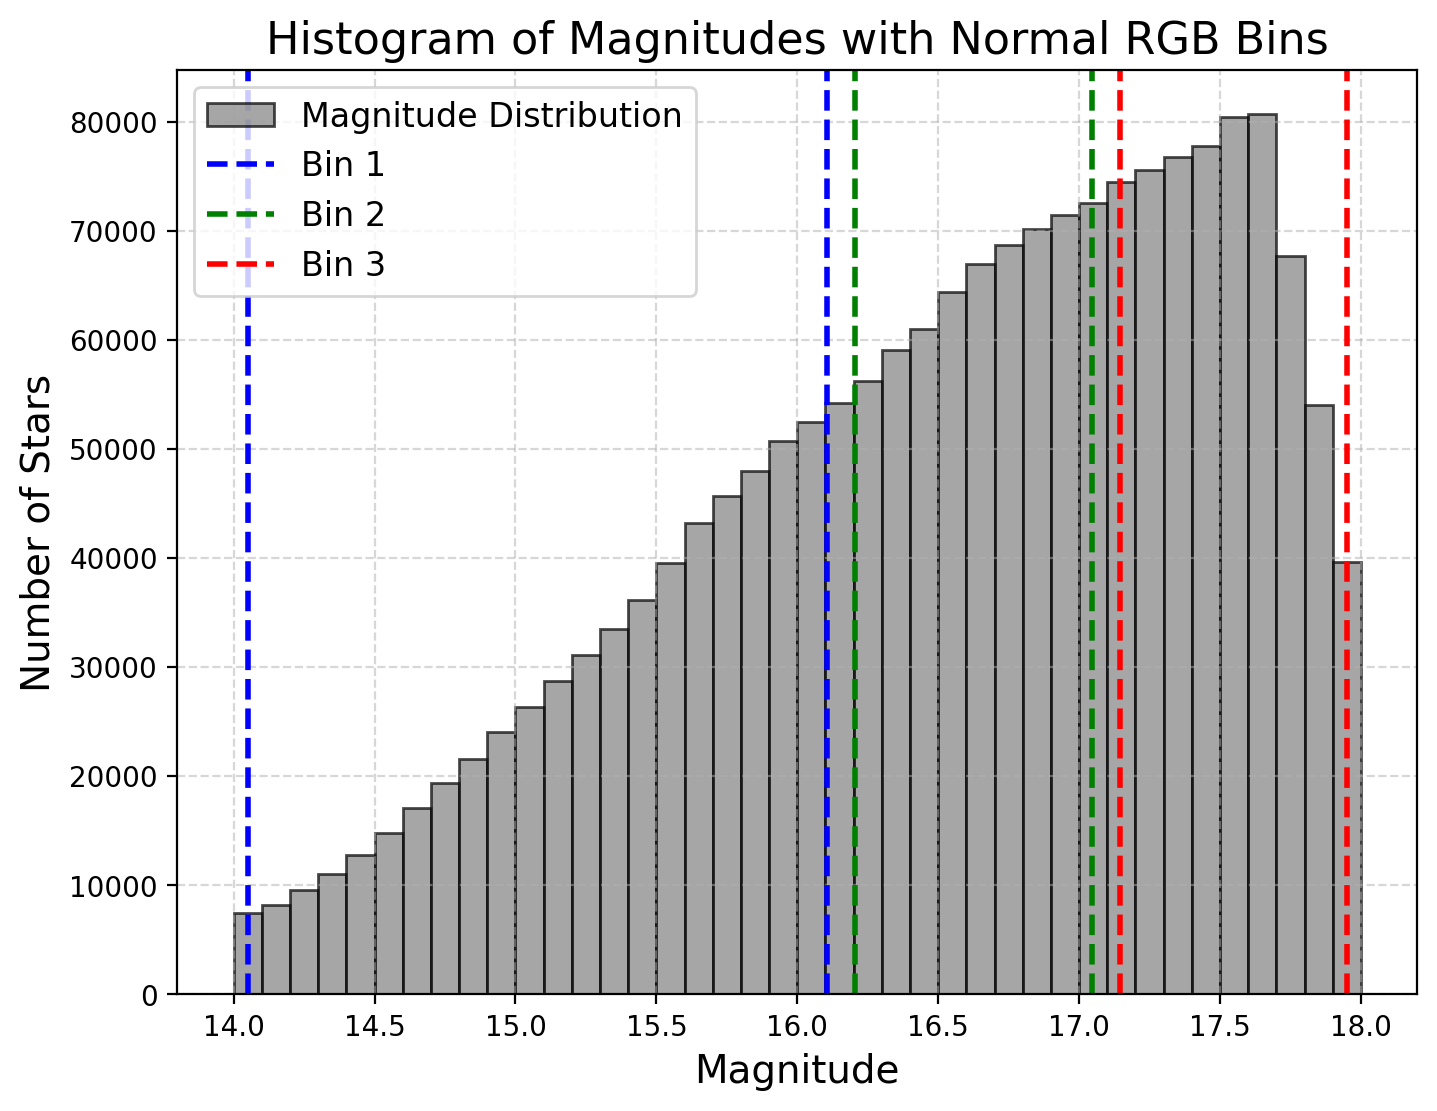

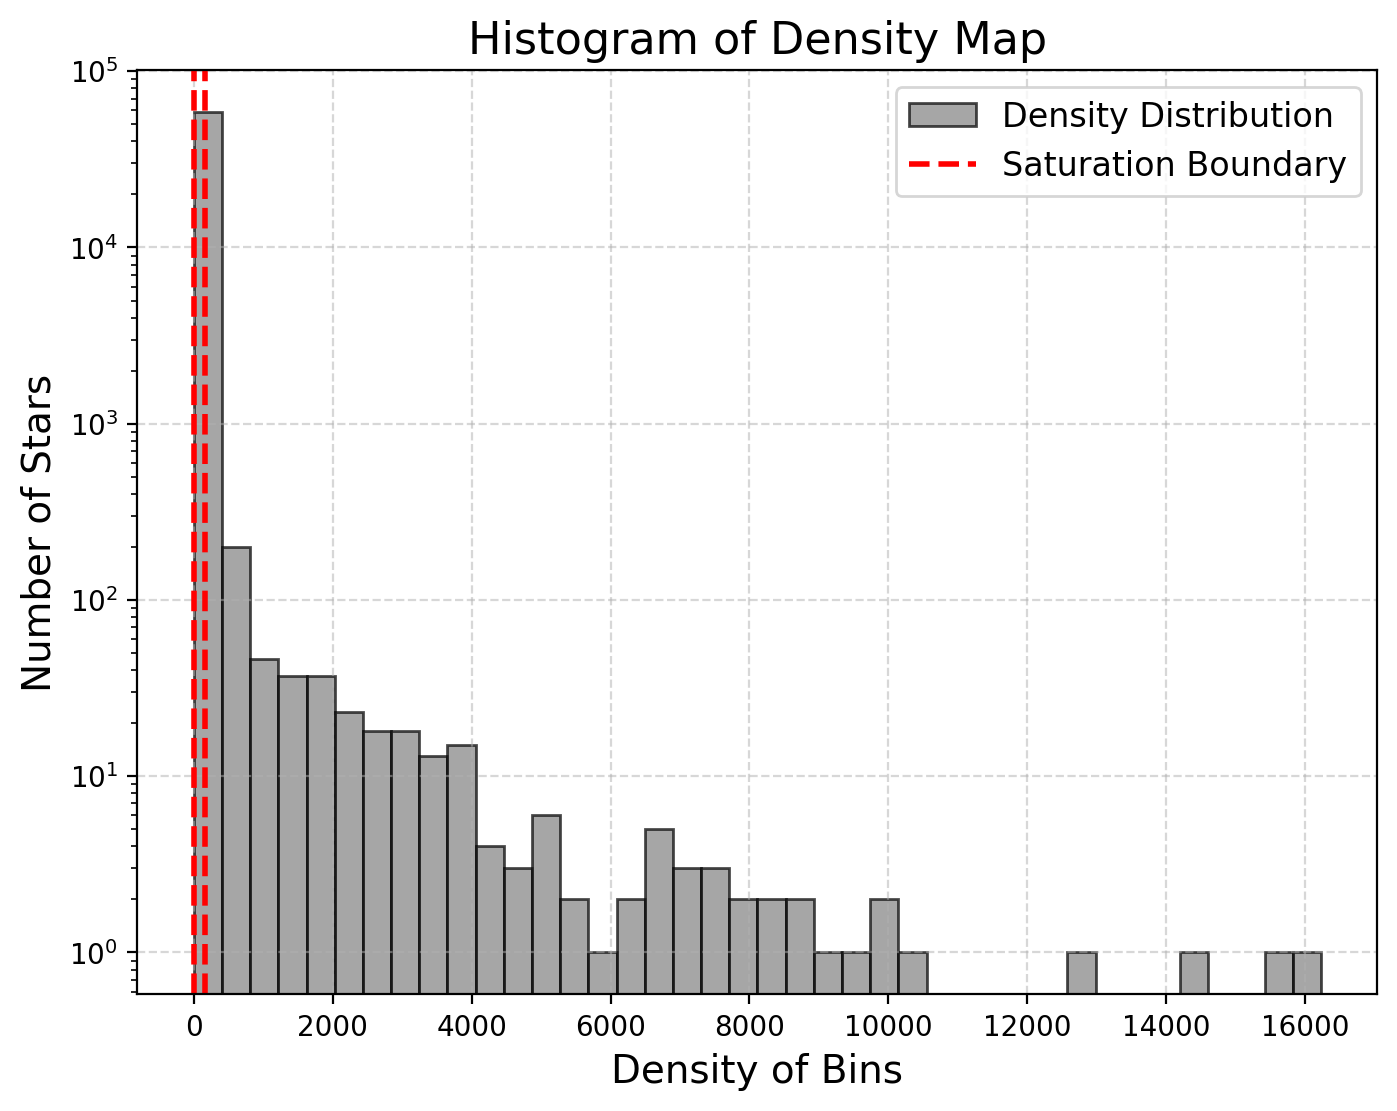

2025-03-31 14:50:15,378 - INFO - 0.0 180.0 -180.0 180.0
2025-03-31 14:50:15,379 - INFO - The interval between parallels is 30 deg -0.00'.
2025-03-31 14:50:15,379 - INFO - The interval between meridians is 30 deg -0.00'.


<Figure size 2000x1200 with 0 Axes>

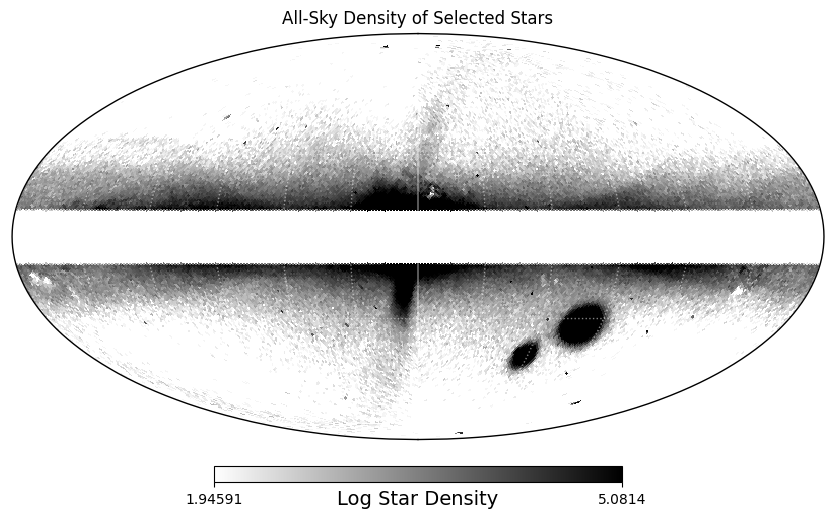

<Figure size 2000x1200 with 0 Axes>

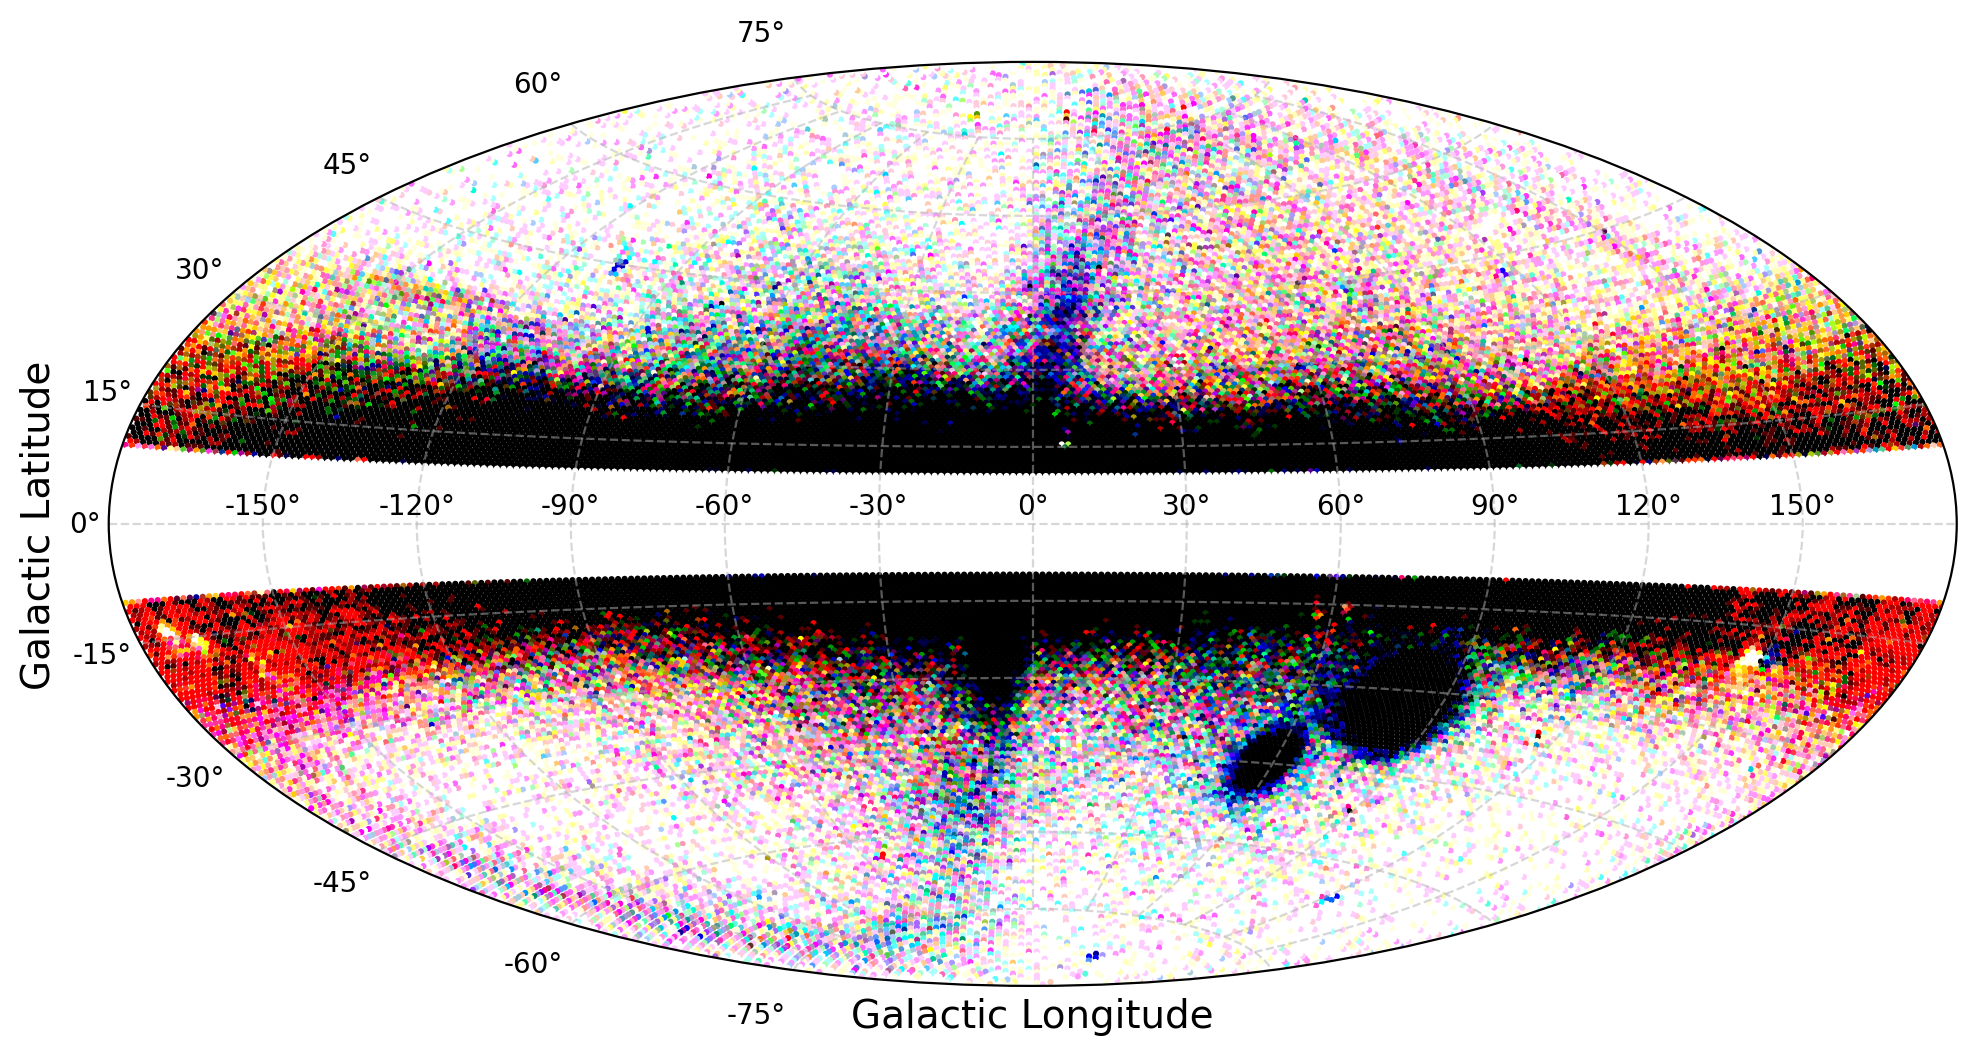

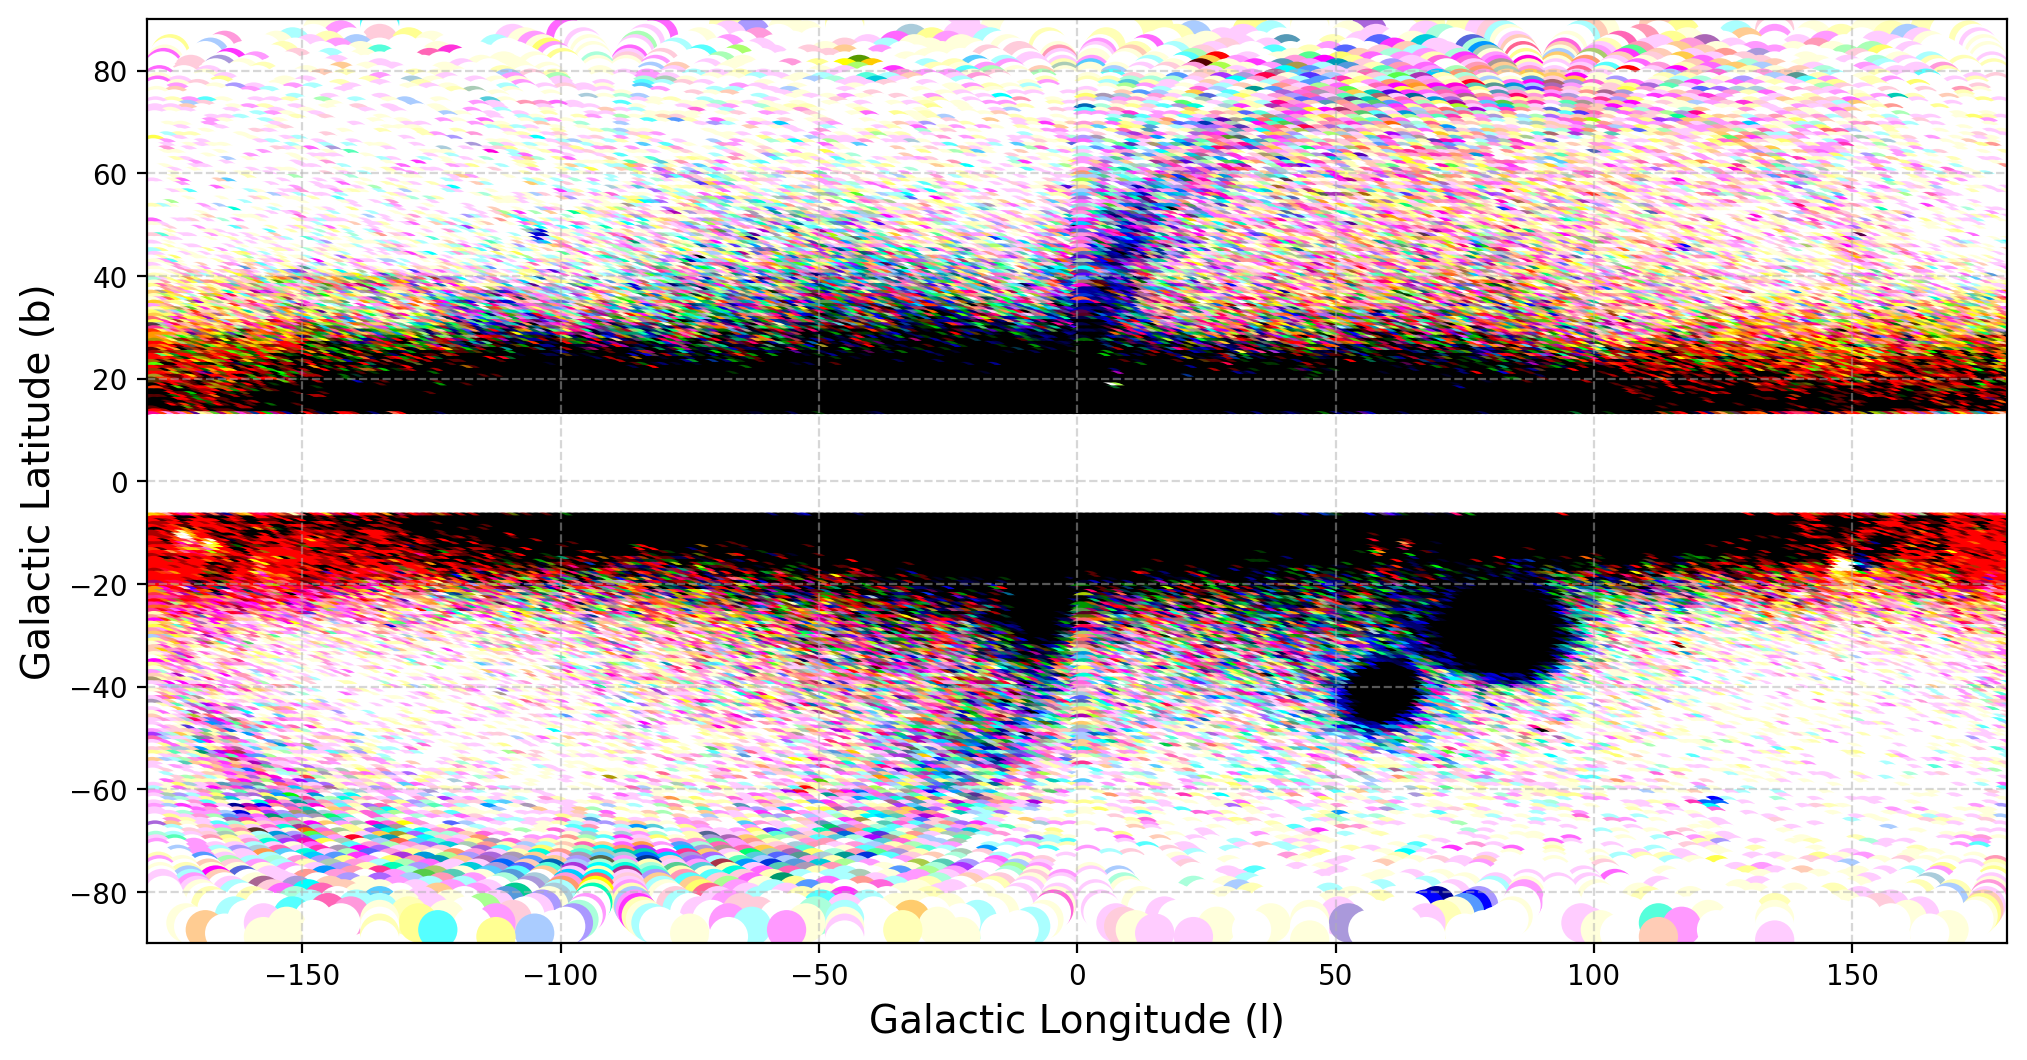

In [25]:
plot_sky_density_healpy(all_sky, nside=70, contrast=(65, 10), vmin=6 , vmax = 160, binning_method='normal', cmap_density="binary", cmap_rgb="hot", log_scale=True)